In [1]:
from imports import *
from utils import *

## Basic Transforms from Torchvision

<br>

**Source:** https://github.com/pytorch/vision/blob/master/references/video_classification/transforms.py <br>

We use some of the transformations provided by `torchvision`:

1. `Resize`
2. `ToFloatTensorInZeroOne` -- Clips all the values to be between 0 and 1
3. `Normalize` -- Normalizes the values with the same values as the pretrained model

The `torchvision` transforms change the shape from `(T, H, W, C)` to `(C, T, H, W)` because all the pretrained models expect the input to be in this format

In [2]:
#export

import torch
import random

def resize(vid, size, interpolation='bilinear'):
    # NOTE: using bilinear interpolation because we don't work on minibatches
    # at this level
    scale = None
    if isinstance(size, int):
        scale = float(size) / min(vid.shape[-2:])
        size = None
    return torch.nn.functional.interpolate(
        vid, size=size, scale_factor=scale, mode=interpolation, align_corners=False)


def to_normalized_float_tensor(vid):
    return vid.permute(3, 0, 1, 2).to(torch.float32) / 255


def normalize(vid, mean, std):
    shape = (-1,) + (1,) * (vid.dim() - 1)
    mean = torch.as_tensor(mean).reshape(shape)
    std = torch.as_tensor(std).reshape(shape)
    return (vid - mean) / std


# Class interface


class Resize(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, vid):
        return resize(vid, self.size)


class ToFloatTensorInZeroOne(object):
    def __call__(self, vid):
        return to_normalized_float_tensor(vid)


class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, vid):
        return normalize(vid, self.mean, self.std)

In [3]:
data_dir = Path('/home/rahul/github_projects/video-classification/data')

In [4]:
video = read_video_tensor(data_dir/'tennis.mp4')
video.shape

torch.Size([42, 1080, 1920, 3])

In [5]:
#export
import torchvision

def get_tfms_torch(height=128, width=227, resize_fct=3): 
    if not resize_fct is None: height, width = height*resize_fct, width*resize_fct
    tfms = torchvision.transforms.Compose([
        ToFloatTensorInZeroOne(),
        Resize((height, width)),
        Normalize(mean=[0.43216, 0.394666, 0.37645],
                  std=[0.22803, 0.22145, 0.216989])
    ])
    return tfms

## Visualizing the Transformed Data

> The `torchvision` transforms change the shape from `(T, H, W, C)` to `(C, T, H, W)` because all the pretrained models expect the input to be in this format

In [6]:
tfms = get_tfms_torch(resize_fct=9)

tfm_vid = tfms(video)
tfm_vid.shape

torch.Size([3, 42, 1152, 2043])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


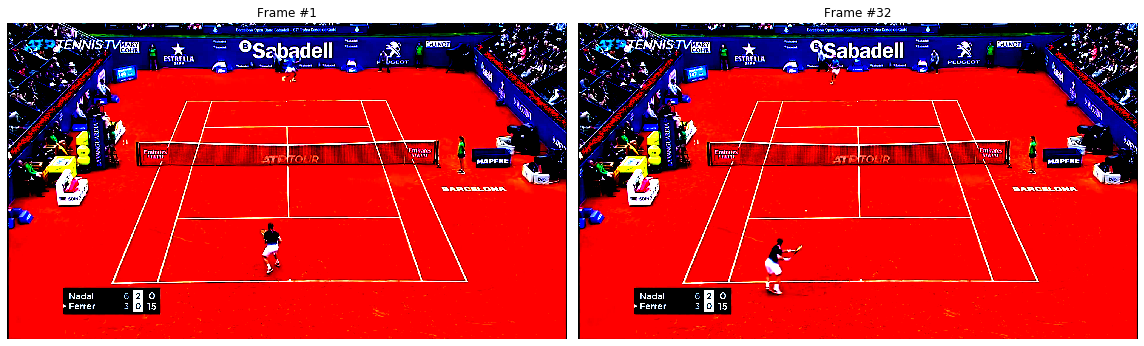

In [7]:
plot_adjacent(tfm_vid.permute(1,2,3,0))

In [8]:
!python notebook2script.py 01_tfms_torch.ipynb

Converted 01_tfms_torch.ipynb to tfms_torch.py
